In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [3]:
dt = pd.read_csv(r'C:\Users\MONTU\Desktop\data science videos\project\real estate prediction\bengaluru-house-price-data\Bengaluru_House_Data.csv')
dt

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
dt.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
dt.shape

(13320, 9)

In [6]:
dt.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
dt1= dt.drop(['area_type', 'availability', 'society'], axis='columns')
dt1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [8]:
dt1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
dt1= dt1.dropna()

In [10]:
dt1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
dt1.shape

(12710, 6)

In [12]:
dt1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

unique function gives a unique values of all the variables present in a column

In [13]:
dt1['bhk'] = dt1['size'].apply(lambda x: int(x.split(' ')[0]))
dt1

C:\Users\MONTU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


in the above step , since the values for size are not the same i.e. bhk or bedroom<br>
we remove the words keeping only the numbrs as all the words mean the same

we do this by using the python lambda function <br>
lambda x : x contains the value of the column(size)<br>
since the entire value is one single token, we split the value into 2 tokens (2 AND BHK) so as to seperate them<br>
this is done using the split function.<br>
and then we take only the first token i.e the number value([0]) and covert the string of numbers into seperate integers

In [14]:
 dt1['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
dt1[dt1.bhk==43]

,location,size,total_sqft,bath,balcony,price,bhk
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
dt1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

since some of the vlues in total_sqft conatains range (1133-1384), we convert them into single numbers by taking their mean 

In [17]:
 def is_float(x):
        try:
            float(x)
        except:
            return False
        return True

the above function converts the input value into float and if it is not a legal value(range value or any other type)<br>
it throws that value into exception

In [18]:
dt1[dt1['total_sqft'].apply(is_float)]

#this returns all the values that have been converted into float

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [19]:
dt1[~dt1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


' ~ ' shows all the values that went into exception in the is_float function

In [20]:
def range_to_mean(x):
    tokens= x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+ float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None


In [21]:
#range_to_mean('1222')
#range_to_mean('1222-1223')

#sample values to test the function

In [22]:
dt1['total_sqft']= dt1['total_sqft'].apply(range_to_mean)
dt1

C:\Users\MONTU\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [23]:
#dt1[dt1['total_sqft'].apply(range_to_mean)].head()

In [24]:
dt1.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath                1
balcony             0
price            18.5
bhk                 1
Name: 410, dtype: object

In [25]:
dt1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [26]:
dt1.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [27]:
dt2= dt1.dropna()

In [28]:
dt2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [29]:
dt3= dt2.copy()

dt3['price_per_sqft']= dt3['price']*100000/dt3['total_sqft']


In [30]:
dt3

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [31]:
dt3.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [32]:
len(dt3.location.unique())

1259

In [33]:
dt3.location= dt3.location.apply(lambda x: x.strip())

x.strip removes the unnecessary spaces at the front and behind the words or numbers


In [34]:
location_stats= dt3.groupby('location')['location'].agg('count').sort_values(ascending=False)
print(location_stats)

location
Whitefield                              514
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          259
Thanisandra                             233
                                       ... 
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
Kengeri Satellite Town ( BDA SITE)        1
1 Annasandrapalya                         1
Name: location, Length: 1248, dtype: int64


above functions groupby's the data acoording to the column ('location') and gives a ['location'] column on which we perform aggregarion of count agg("count")

In [35]:
len(dt3.location.unique())

1248

In [36]:
location_stats_lessthan_10= location_stats[location_stats<=10]
location_stats_lessthan_10

location
Naganathapura                           10
HAL 2nd Stage                           10
Gunjur Palya                            10
1st Block Koramangala                   10
Doddaballapur                           10
                                        ..
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
Kengeri Satellite Town ( BDA SITE)       1
1 Annasandrapalya                        1
Name: location, Length: 1013, dtype: int64

In [37]:
dt4= dt3.copy()

In [38]:
dt4

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [39]:
dt4.location= dt4.location.apply(lambda x: "other" if x in location_stats_lessthan_10 else x)
len(dt4.location.unique())

236

In [40]:
len(dt3.location.unique())

1248

In [41]:
dt4.tail(15)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
13302,other,2 BHK,1075.0,2.0,2.0,48.00,2,4465.116279
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.00,5,9043.927649
13304,Raja Rajeshwari Nagar,2 BHK,1187.0,2.0,2.0,40.14,2,3381.634372
13305,Hulimavu,1 BHK,500.0,1.0,3.0,220.00,1,44000.000000
13307,Billekahalli,3 BHK,1805.0,3.0,3.0,134.00,3,7423.822715
13308,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.00,3,9299.279633
13310,Rachenahalli,2 BHK,1050.0,2.0,2.0,52.71,2,5020.000000
13311,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,2.0,250.00,7,16666.666667
13312,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,2,3724.247227
13313,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3,4237.918216


In [42]:
dt3.tail(15)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
13302,Annaiah Reddy Layout,2 BHK,1075.0,2.0,2.0,48.00,2,4465.116279
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.00,5,9043.927649
13304,Raja Rajeshwari Nagar,2 BHK,1187.0,2.0,2.0,40.14,2,3381.634372
13305,Hulimavu,1 BHK,500.0,1.0,3.0,220.00,1,44000.000000
13307,Billekahalli,3 BHK,1805.0,3.0,3.0,134.00,3,7423.822715
13308,Bannerghatta Road,3 BHK,1527.0,3.0,1.0,142.00,3,9299.279633
13310,Rachenahalli,2 BHK,1050.0,2.0,2.0,52.71,2,5020.000000
13311,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,2.0,250.00,7,16666.666667
13312,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,2,3724.247227
13313,Uttarahalli,3 BHK,1345.0,2.0,1.0,57.00,3,4237.918216


In [43]:
dt4.shape

(12668, 8)

In [44]:
dt4=dt4[~(dt4.total_sqft/dt4.bhk<300)]

In [45]:
dt4.shape

(12013, 8)

the above step is taken to remone any outliers that may be present<br>
for this a threshold vaalue has to be taken (300)<br>
this value is taken such that the values belo this value seem to be not valid(fake)<br>
for ex. a 2 bhk flat cannot have a total_sqft are of 300sqft(generally, more than that)<br>
hence these kind of entries seems to be fake and are removed

In [46]:
def remove_ppf_outliers(dt):
    dt_out=pd.DataFrame()
    for key, sub_dt in dt.groupby('location'):
        m=np.mean(sub_dt.price_per_sqft)
        s=np.std(sub_dt.price_per_sqft)
        reduced_dt= sub_dt[(sub_dt.price_per_sqft>(m-s)) & (sub_dt.price_per_sqft<(m+s))]
        dt_out= pd.concat([dt_out, reduced_dt],ignore_index=True)
    return dt_out

dt5= remove_ppf_outliers(dt4)
dt5.shape
    

(9852, 8)

in every dataset there can be some vlues which seem unrealistic when compared to others<br>
for ex. the price of a 2bhk is too large than the price of a 3bhk for the same sqft area(approx)<br>
these unrealistic values need to be removed to improve prediction

the above function remove_ppf_outliers does the same thing<br>
1) dt_out is the new dataframe created<br>
2) then the dataframe is grouped by locaion so as to get the price_per_sqft<br>
3) then every location is further split into a sub dataframe (sub_dt) and the mean and std.deviation is calculated(m,s)<br>
4) then this sub_dt is added to reduced_dt( rediced dtaframe) in the manner that tha only the values greater the m-s and the valued less than m+s are taken from sub_dt into reduced_st<br>
5) finally these values( reduced_dt) are concatenated into dt_out to create a new dataframe

In [47]:
dt5.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
bhk               0
price_per_sqft    0
dtype: int64

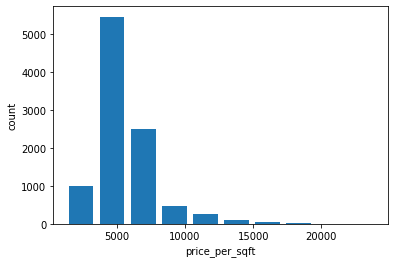

In [48]:
plt.hist(dt5.price_per_sqft,rwidth=0.8)
plt.xlabel('price_per_sqft')
plt.ylabel('count')
plt.show()


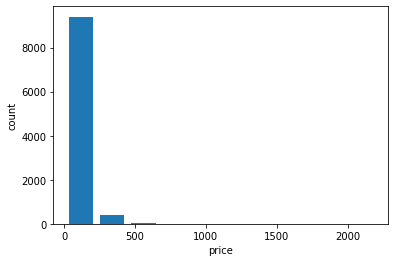

In [49]:
plt.hist(dt5.price,rwidth=0.8)
plt.xlabel('price')
plt.ylabel('count')
plt.show()


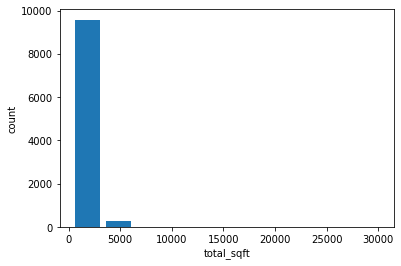

In [50]:
plt.hist(dt5.total_sqft,rwidth=0.8)
plt.xlabel('total_sqft')
plt.ylabel('count')
plt.show()


In [51]:
dt6 =dt5[dt5.bath>dt5.bhk+2]
dt6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1542,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8082,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


here we can see that the numbr of bathrooms are greater than the number of bedrrom, which is unusual<br>
therefore we remove them


In [52]:
dt6= dt5[dt5.bath<dt5.bhk+2]
dt6

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...,...
9847,other,2 BHK,1256.0,2.0,1.0,65.00,2,5175.159236
9848,other,2 BHK,1353.0,2.0,2.0,110.00,2,8130.081301
9849,other,1 Bedroom,812.0,1.0,0.0,26.00,1,3201.970443
9850,other,3 BHK,1440.0,2.0,2.0,63.93,3,4439.583333


we only take the entires where bath is less than number of bhk+2

In [53]:
dt6.shape

(9771, 8)

In [54]:
dt6= dt6.drop(['size','price_per_sqft'], axis='columns')
dt6.shape

(9771, 6)

we removed size and price_pers_sqft since size is already converted into bhk and price_per_sqft was only for outlier detection (also we already have price) 

In [55]:
 dt6.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


In [56]:
dt6.location= dt6.location.apply(lambda x: x.strip())

In [57]:
dummies= pd.get_dummies(dt6.location)
dummies.head(20)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


dummies funcion helps to convert words into 0's and 1's basaed on their locations

In [58]:
dt7= pd.concat([dt6,dummies.drop('other', axis='columns')], axis='columns')
dt7

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.00,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3.0,235.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2.0,148.00,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,other,1256.0,2.0,1.0,65.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9848,other,1353.0,2.0,2.0,110.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9849,other,812.0,1.0,0.0,26.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9850,other,1440.0,2.0,2.0,63.93,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


we drop 'other' because  to represent 'other' we can use 0's in the remaining columns<br>
THIS IS ALSO KNOWN AS THE DUMMY TRAP

In [59]:
dt7= dt7.drop('location', axis='columns')

In [60]:
dt7.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
dt7.isnull().sum()

total_sqft            0
bath                  0
balcony               0
price                 0
bhk                   0
                     ..
Yelachenahalli        0
Yelahanka             0
Yelahanka New Town    0
Yelenahalli           0
Yeshwanthpur          0
Length: 240, dtype: int64

In [62]:
dt7.shape

(9771, 240)

## model training begins

In [63]:
x= dt7.drop('price', axis='columns')
x.head()

#our target is price since price is the dependent variable

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y=dt7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=10)

In [66]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
model.score(x_test, y_test)

0.8004584566970872

In [68]:
model.score(x_train, y_train)

0.8132846947233906

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0 )
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.83725862, 0.79905165, 0.79709248, 0.8109872 , 0.85279675])

### cross validation
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


The general procedure is as follows:

1)Shuffle the dataset randomly.<br>
2)Split the dataset into k groups<br>
3)For each unique group:<br>
<pre>a)Take the group as a hold out or test data set<br>
<pre>b)Take the remaining groups as a training data set<br>
<pre>c)Fit a model on the training set and evaluate it on the test set<br>
<pre>d)Retain the evaluation score and discard the model<br>
4)Summarize the skill of the model using the sample of model evaluation scores

### ShuffleSplit
<br>
Random permutation cross-validator<br>
Yields indices to split data into training and test sets.<br>

<br>
n_splits : int, default 10    (Number of re-shuffling & splitting iterations.)

In [70]:
model1= DecisionTreeRegressor()
model1.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
model1.score(x_train, y_train)

0.9907368522658325

In [72]:
model1.score(x_test, y_test)

0.719687035624454

In [73]:
cv1= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0 )
cross_val_score(DecisionTreeRegressor(), x, y, cv=cv1)

array([0.71086539, 0.53382251, 0.73448999, 0.43358962, 0.54221915])

In [74]:
def predict_price(location, total_sqft, bath, bhk, balcony):
    loc_index= np.where(x.columns==location)[0][0]
    
    X= np.zeros(len(x.columns))
    X[0]= total_sqft
    X[1]= bath
    X[2]= bhk
    X[3]= balcony
    if loc_index>=0:
        x[loc_index]=1
    
    return model.predict([X])[0]

In [75]:
predict_price('Vijayanagar', 1200, 2, 3, 1)

71.76632402254927

In [76]:
predict_price('Vijayanagar', 1200, 2, 3, 1)

ValueError: shapes (1,240) and (239,) not aligned: 240 (dim 1) != 239 (dim 0)